# **Milestone 4**

Descriptions - To be done

## Preparation Steps

In [1]:
# Import all necessary python packages

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset

df = pd.read_csv('input/walmart-dataset/Walmart.csv')


## <font color = 'blue'> 1. Inspecting the Dataset </font>


In [3]:
# Inspect dataset structure
print('Dataset structure:')
print(df.info())


Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [4]:
# Check data types
print('\nData types:')
print(df.dtypes)



Data types:
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [5]:
# Summarize numerical columns
print('\nSummary statistics:')
print(df.describe())


Summary statistics:
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.23

In [6]:
# Check for missing values
print('\nMissing values:')
print(df.isnull().sum())


Missing values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [7]:
# Identify potential outliers
print('\nPotential outliers:')
for col in df.columns:
    if not df[col].dtype == 'object':
        print(f'{col}: {df[col].describe(percentiles=[.25, .75, .99])}')


Potential outliers:
Store: count    6435.000000
mean       23.000000
std        12.988182
min         1.000000
25%        12.000000
50%        23.000000
75%        34.000000
99%        45.000000
max        45.000000
Name: Store, dtype: float64
Weekly_Sales: count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
99%      2.404035e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64
Holiday_Flag: count    6435.000000
mean        0.069930
std         0.255049
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
99%         1.000000
max         1.000000
Name: Holiday_Flag, dtype: float64
Temperature: count    6435.000000
mean       60.663782
std        18.444933
min        -2.060000
25%        47.460000
50%        62.670000
75%        74.940000
99%        93.190000
max       100.140000
Name: Temperature, dtype: float64
Fuel_Price: count    6435.000000
m

In [8]:
# Reframing the columns

# Convert 'Date' to datetime format
df.Date = pd.to_datetime(df.Date)

# Extract weekday, month, and year from 'Date'
df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

# Drop 'Date' column
df.drop('Date', axis=1, inplace=True)

# Define target and feature columns
target = 'Weekly_Sales'
features = [col for col in df.columns if col != target]

# Create a copy of the original dataframe
original_df = df.copy(deep=True)

# Display the first few rows of the reframed dataframe
display(df.head())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [9]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   year          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


In [10]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Holiday_Flag       2
year               3
weekday            7
month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [11]:
# Check the number of unique rows in each feature
unique_values = df[features].nunique()

# Identify numerical and categorical features
numerical_features = unique_values[unique_values <= 45].index.tolist()
categorical_features = unique_values[unique_values > 45].index.tolist()

print('\n\033[1mInference:\033[0m The Dataset has {} numerical & {} categorical features.'.format(len(numerical_features), len(categorical_features)))



Inference: The Dataset has 5 numerical & 4 categorical features.


In [12]:
#Checking the stats of all the columns

display(df.describe())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,12.000000,2012.000000


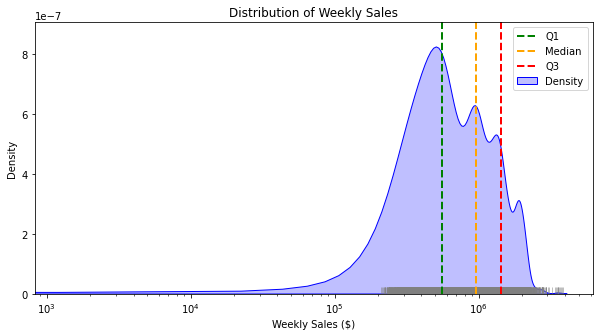

In [13]:
#Let us first analyze the distribution of the target variable

import seaborn as sns
import matplotlib.pyplot as plt

# Extract the target variable
target = 'Weekly_Sales'

# Create the plot
plt.figure(figsize=(10, 5))

# Kernel density estimation plot
sns.kdeplot(df[target], color='blue', shade=True, label='Density')

# Rugplot to show individual data points
sns.rugplot(df[target], color='gray', alpha=0.5)

# Quantile lines
plt.axvline(df[target].quantile(0.25), color='green', linestyle='dashed', linewidth=2, label='Q1')
plt.axvline(df[target].quantile(0.50), color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(df[target].quantile(0.75), color='red', linestyle='dashed', linewidth=2, label='Q3')

# Logarithmic x-axis
plt.xscale('log')

# Labels and title
plt.xlabel('Weekly Sales ($)')
plt.ylabel('Density')
plt.title('Distribution of Weekly Sales')
plt.legend()

# Show the plot
plt.show()


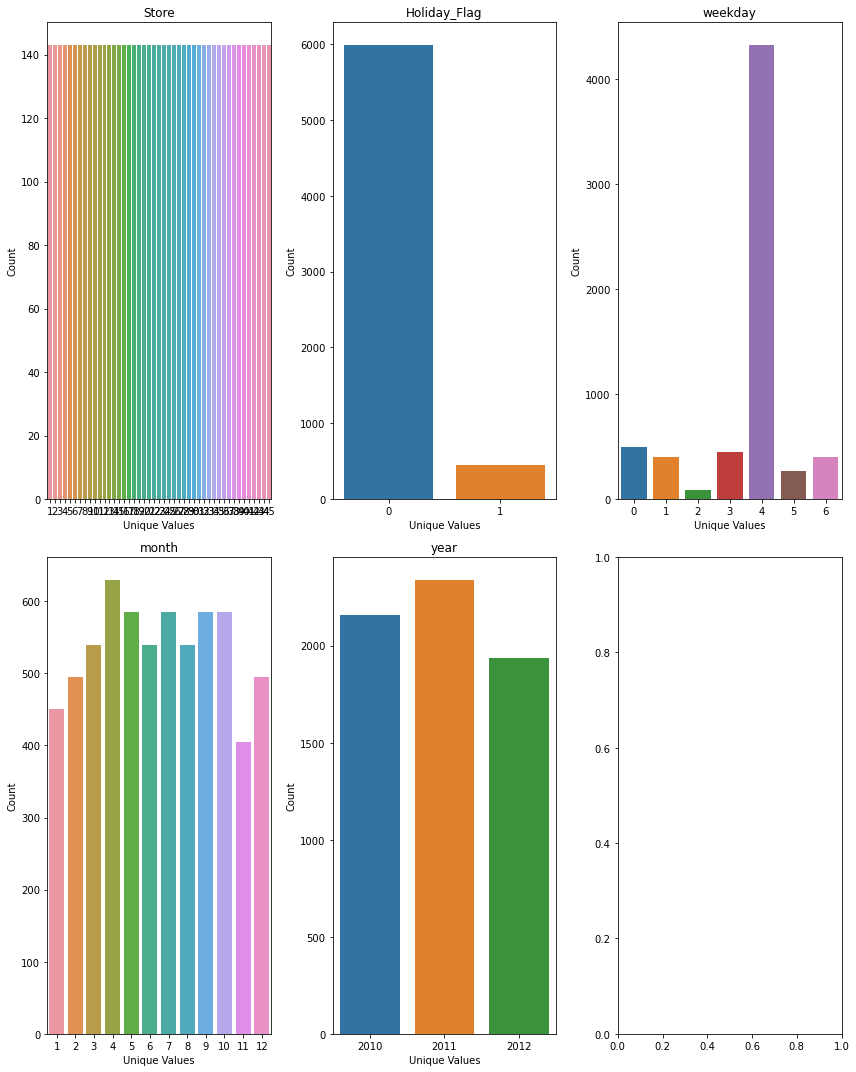

In [14]:
#Visualising the categorical features 

import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of categorical features
categorical_features = df[features].columns[df[features].nunique() <= 45]

# Define the number of rows and columns for subplots
num_rows = math.ceil(len(categorical_features) / 3)
num_cols = 3

# Create the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 15))

# Iterate over categorical features and create subplots
for i, feature in enumerate(categorical_features):
    row = i // num_cols
    col = i % num_cols

    # Create the subplot
    ax = axes[row, col]

    # Countplot for the categorical feature
    sns.countplot(df[feature], ax=ax)

    # Set subplot title and labels
    ax.set_title(feature)
    ax.set_xlabel('Unique Values')
    ax.set_ylabel('Count')

# Adjust subplot layout and display the figure
plt.tight_layout()
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

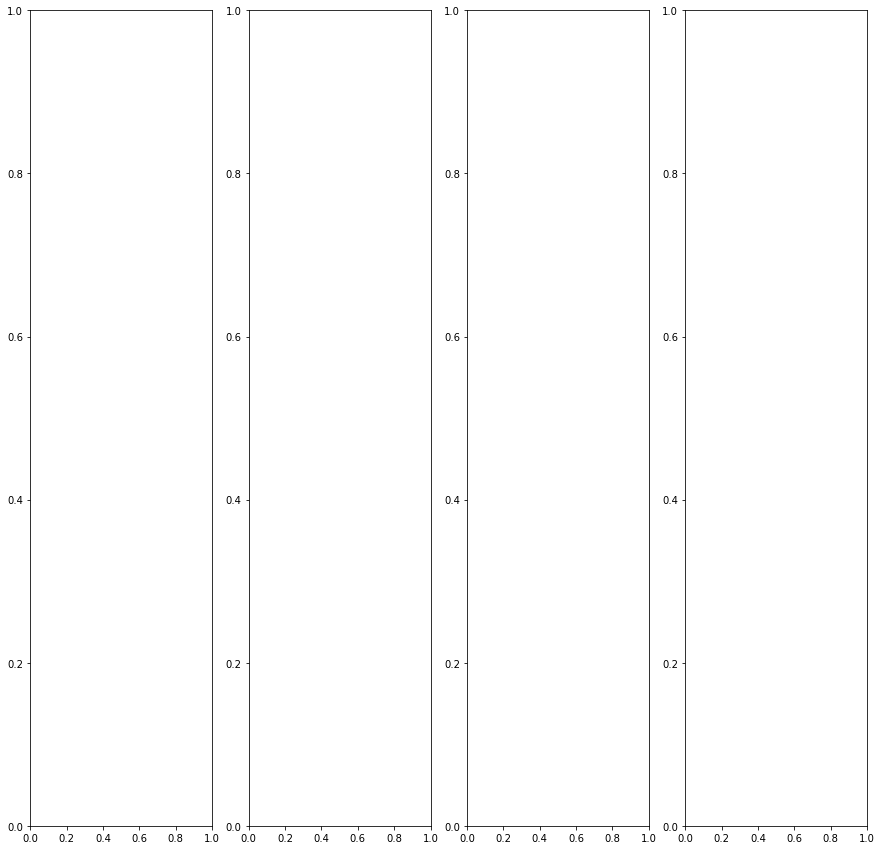

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of numerical features
numerical_features = df[features].columns[df[features].nunique() > 45]

# Define the number of rows and columns for subplots
num_rows = math.ceil(len(numerical_features) / 4)
num_cols = 4

# Color palette for distribution plots
color_palette = sns.color_palette('hls', len(numerical_features))

# Create a figure for distribution plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate over numerical features and create distribution plots
for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols

    # Create the subplot
    ax = axes[row, col]

    # Distribution plot with adjusted bin size
    sns.distplot(df[feature], ax=ax, hist_kws=dict(edgecolor="black", linewidth=2), bins=20, color=color_palette[i])

    # Set subplot title and labels
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

# Adjust subplot layout and display the figure
plt.tight_layout()
plt.show()

# Create a figure for boxplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate over numerical features and create boxplots
for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols

    # Create the subplot
    ax = axes[row, col]

    # Boxplot with customized aesthetics
    df.boxplot(feature, ax=ax)

    # Set subplot title and labels
    ax.set_title(feature)
    ax.set_xlabel('')

# Tight layout and display
plt.tight_layout()
plt.show()

In [ ]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

In [ ]:
# Create a copy of the original dataframe to preserve the original data
original_df = df.copy(deep=True)

# Check for duplicate rows
duplicates_exist = df.duplicated().any()

# Remove duplicate rows if they exist
if duplicates_exist:
    print('\n\033[1mRemoving duplicate rows...')
    df.drop_duplicates(inplace=True)

    # Calculate the number of duplicates removed
    num_duplicates_removed = original_df.shape[0] - df.shape[0]

    # Print a message indicating the number of duplicates removed
    print(f'\n\033[1mNumber of duplicates removed/fixed: {num_duplicates_removed}')

# If there are no duplicates, print an informative message
else:
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')


In [ ]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

In [ ]:
# Check for empty elements
missing_values = df.isnull().sum().reset_index().rename(columns={'index': 'Feature', 'isnull': 'Total Missing Values'})
missing_values['Percentage Missing Values'] = round(missing_values['Total Missing Values'] / df.shape[0], 3) * 100

print(missing_values)


In [ ]:
# Create a copy of the original dataframe
df3 = df.copy()

# Identify categorical columns with non-zero missing values
non_zero_missing_categorical_columns = nvc[nvc['Percentage'] != 0].index.tolist()

# Separate columns for one-hot encoding and dummy encoding
one_hot_columns = [i for i in categorical_features if i in non_zero_missing_categorical_columns and df3[i].nunique() == 2]
dummy_columns = [i for i in categorical_features if i in non_zero_missing_categorical_columns and df3[i].nunique() > 2]

# Perform one-hot encoding for columns with two unique values
if len(one_hot_columns) > 0:
    print("\n\033[1mOne-Hot Encoding on features:")
    for col in one_hot_columns:
        print(col)
        df3[col] = pd.get_dummies(df3[col], drop_first=True, prefix=col)

# Perform dummy encoding for columns with more than two unique values
if len(dummy_columns) > 0:
    print("\n\033[1mDummy Encoding on features:")
    for col in dummy_columns:
        print(col)
        df3 = pd.concat([df3.drop([col], axis=1), pd.DataFrame(pd.get_dummies(df3[col], drop_first=True, prefix=col))], axis=1)

print(df3.shape)


##  <font color = 'blue'> 2. IQR Outlier Removal </font>



In [ ]:
# Create a copy of the original dataframe
df1 = df3.copy()

# Define features for outlier removal
features1 = nf

# Remove outliers using IQR method
for col in features1:
    # Calculate IQR more efficiently
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3 - q1

    # Filter data within 1.5 IQR of quartiles
    df1 = df1[df1[col] <= (q3 + 1.5 * iqr)]
    df1 = df1[df1[col] >= (q1 - 1.5 * iqr)]

    # Reset index after each filtering
    df1 = df1.reset_index(drop=True)

# Display the head of the processed dataset
display(df1.head())

# Print informative messages about outlier removal
print("\n\033[1mInference:\033[0m\nBefore outlier removal, the dataset had {} samples.".format(df3.shape[0]))
print("After outlier removal, the dataset now has {} samples.".format(df1.shape[0]))


##  <font color = 'blue'> 3. Missing Values Imputation for Data Preprocessing </font>



In [ ]:
# 1. Missing Values Assessment
# Identify features with missing values in the dataset
features_with_missing_values = df_pca.columns[df_pca.isnull().any()].tolist()

# Quantify the extent of missing data for each relevant feature
missing_values_summary = df_pca[features_with_missing_values].isnull().sum()
missing_values_percentage = (missing_values_summary / len(df_pca)) * 100

# Print missing values summary
print("\nFeatures with Missing Values:")
print(features_with_missing_values)
print("\nMissing Values Summary:")
print(missing_values_summary)
print("\nMissing Values Percentage:")
print(missing_values_percentage)

# 2. Imputation Techniques
# Research and propose suitable imputation techniques
# In this example, we'll use SimpleImputer with mean strategy
imputation_strategy = 'mean'
imputer = SimpleImputer(strategy=imputation_strategy)

# 3. Implementation
# Integrate the selected imputation technique(s) into the data preprocessing pipeline
# Impute missing values for all features with missing values in df_pca
df_pca_imputed = df_pca.copy()
df_pca_imputed[features_with_missing_values] = imputer.fit_transform(df_pca[features_with_missing_values])

# Ensure documentation is updated to reflect the imputation process

# 4. Evaluation
# Assess the impact of imputation on the dataset statistics and distribution
print("\nDataset Statistics Before Imputation:")
print(df_pca.describe())

print("\nDataset Statistics After Imputation:")
print(df_pca_imputed.describe())

# Compare the model performance before and after imputation
# Assuming you have a target variable named 'target_column'
# If your target variable is not directly available, you should modify this part accordingly

# Before imputation
X_train, X_test, y_train, y_test = train_test_split(df_pca.drop('target_column', axis=1), df_pca['target_column'], test_size=0.2, random_state=42)
model_before_imputation = RandomForestRegressor(random_state=42)
model_before_imputation.fit(X_train, y_train)
predictions_before_imputation = model_before_imputation.predict(X_test)
mae_before_imputation = mean_absolute_error(y_test, predictions_before_imputation)

# After imputation
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(df_pca_imputed.drop('target_column', axis=1), df_pca_imputed['target_column'], test_size=0.2, random_state=42)
model_after_imputation = RandomForestRegressor(random_state=42)
model_after_imputation.fit(X_train_imputed, y_train_imputed)
predictions_after_imputation = model_after_imputation.predict(X_test_imputed)
mae_after_imputation = mean_absolute_error(y_test_imputed, predictions_after_imputation)

print("\nModel Performance Comparison:")
print(f"MAE Before Imputation: {mae_before_imputation}")
print(f"MAE After Imputation: {mae_after_imputation}")

##  <font color = 'blue'> 4. Implementation of Cross-Validation for Model Selection </font>

In [ ]:
# Assuming df_pca_imputed is the DataFrame after PCA and missing values imputation
# If df_pca_imputed is not directly available, you should modify this part accordingly

# Assuming 'target_column' is the target variable for modeling
# If your target variable has a different name, make sure to modify this part accordingly

# 1. Current Model Evaluation Review
# Understand the existing methods used for evaluating regression models (R2 and RMSE scores)
# Document the strengths and limitations of the current evaluation process

def evaluate_model(model, X, y_true):
    y_pred = model.predict(X)
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 2. Cross-Validation Implementation
# Research and choose a suitable cross-validation technique (e.g., k-fold cross-validation)
# Implement cross-validation in the model selection phase

# Assuming 'your_model' is the model you want to use for cross-validation
# If you are using a different model, replace 'your_model' with the actual model

model = RandomForestRegressor(random_state=42)  # Replace with your actual model

# Choose a suitable cross-validation technique (e.g., k-fold cross-validation)
# In this example, we use 5-fold cross-validation
cv_results = cross_val_score(model, df_pca_imputed.drop('target_column', axis=1), df_pca_imputed['target_column'],
                             scoring=make_scorer(mean_squared_error), cv=5)

# 3. Performance Metrics Comparison
# Compare the results obtained through cross-validation with the previous evaluation metrics
# Assess the impact of cross-validation on model performance

# Evaluate the model on the entire dataset for comparison
rmse_before_cv, r2_before_cv = evaluate_model(model, df_pca_imputed.drop('target_column', axis=1), df_pca_imputed['target_column'])

# Display results
print("\nModel Evaluation Before Cross-Validation:")
print(f"RMSE: {rmse_before_cv}")
print(f"R2: {r2_before_cv}")

# Display cross-validation results
print("\nCross-Validation Results:")
print("Mean RMSE:", cv_results.mean())
print("Std RMSE:", cv_results.std())

# 4. Documentation
# Update the project's README with details on the implemented cross-validation process
# Provide insights into how cross-validation enhances the reliability of model evaluation

# Add relevant information to your README file about the chosen cross-validation technique and its impact